<a href="https://colab.research.google.com/github/kumarasakti/MachineLearningDicoding/blob/master/Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-25 08:45:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.79MB/s    in 48s     

2020-07-25 08:46:10 (6.37 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile
import os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')
os.mkdir(train_dir)
os.mkdir(valid_dir)
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scis_dir = os.path.join(base_dir, 'scissors')

In [4]:
!rm -rf '/tmp/rockpaperscissors/rps-cv-images'
!rm -rf '/tmp/__MACOSX'

In [5]:
os.listdir(base_dir)

['README_rpc-cv-images.txt',
 'rock',
 'scissors',
 'paper',
 'train',
 'validation']

In [6]:
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4, random_state=62)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4, random_state=62)
train_scis_dir, val_scis_dir = train_test_split(os.listdir(scis_dir), test_size=0.4, random_state=62)

In [7]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scis = os.path.join(train_dir, 'scis')
val_rock = os.path.join(valid_dir, 'rock')
val_paper = os.path.join(valid_dir, 'paper')
val_scis = os.path.join(valid_dir, 'scis')

if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scis):
  os.mkdir(train_scis)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scis):
  os.mkdir(val_scis)

In [8]:
import shutil 

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scis_dir:
  shutil.copy(os.path.join(scis_dir,i), os.path.join(train_scis,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scis_dir:
  shutil.copy(os.path.join(scis_dir,i), os.path.join(val_scis,i))

In [9]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

435

In [10]:
len(os.listdir('/tmp/rockpaperscissors/validation/rock'))

291

In [11]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

427

In [12]:
len(os.listdir('/tmp/rockpaperscissors/validation/paper'))

285

In [13]:
len(os.listdir('/tmp/rockpaperscissors/train/scis'))

450

In [14]:
len(os.listdir('/tmp/rockpaperscissors/validation/scis'))

300

In [15]:
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 
)
test_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [16]:
train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(100,150),
    shuffle=True,
    class_mode='categorical',
    batch_size=32,
)

validation_generator = train_data.flow_from_directory(
    valid_dir,
    target_size=(100,150),
    batch_size=32,
    class_mode='categorical',
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Dalam pembuatan model saya menggunakan 4 layer dengan input shape 100,150.


In [59]:
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.04):
            print()
            print("Reached almost 99% accuracy so cancelling training!")
            self.model.stop_training = True


callbacks = callBack()

In [65]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding='same', strides =(2,2), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', strides =(2,2), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', strides =(2,2), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', strides =(2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 75, 16)        448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 38, 32)        4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 19, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 10, 128)        73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 8960)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4588032   
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [66]:
opt = tf.optimizers.Adam() 
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy']
)

In [67]:
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/20
25/25 - 8s - loss: 1.1350 - accuracy: 0.3363 - val_loss: 1.0860 - val_accuracy: 0.3750
Epoch 2/20
25/25 - 8s - loss: 1.0568 - accuracy: 0.4375 - val_loss: 1.0864 - val_accuracy: 0.4375
Epoch 3/20
25/25 - 8s - loss: 0.9300 - accuracy: 0.5700 - val_loss: 0.6952 - val_accuracy: 0.7000
Epoch 4/20
25/25 - 8s - loss: 0.6642 - accuracy: 0.7013 - val_loss: 0.5802 - val_accuracy: 0.7437
Epoch 5/20
25/25 - 8s - loss: 0.6369 - accuracy: 0.7300 - val_loss: 0.4952 - val_accuracy: 0.8062
Epoch 6/20
25/25 - 8s - loss: 0.5447 - accuracy: 0.7575 - val_loss: 0.6186 - val_accuracy: 0.7063
Epoch 7/20
25/25 - 8s - loss: 0.5228 - accuracy: 0.7788 - val_loss: 0.4996 - val_accuracy: 0.7812
Epoch 8/20
25/25 - 8s - loss: 0.4226 - accuracy: 0.8313 - val_loss: 0.3693 - val_accuracy: 0.8750
Epoch 9/20
25/25 - 8s - loss: 0.4173 - accuracy: 0.8263 - val_loss: 0.4056 - val_accuracy: 0.8438
Epoch 10/20
25/25 - 8s - loss: 0.4200 - accuracy: 0.8250 - val_loss: 0.3798 - val_accuracy: 0.8687
Epoch 11/20
25/25 -

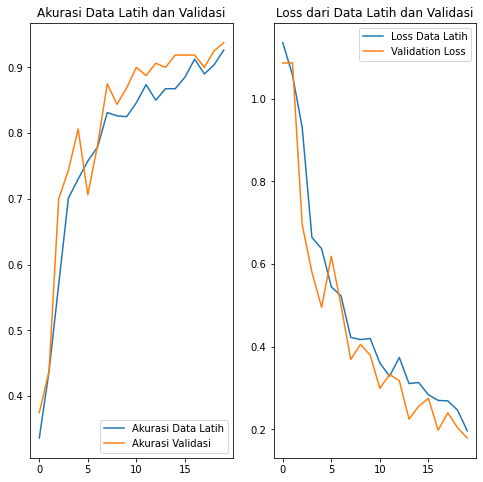

In [68]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Akurasi Data Latih')
plt.plot(epochs_range, val_acc, label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Data Latih dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss Data Latih')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss dari Data Latih dan Validasi')
plt.show()

Saving photo6102734076613077485.jpg to photo6102734076613077485.jpg
photo6102734076613077485.jpg
paper alias kertas


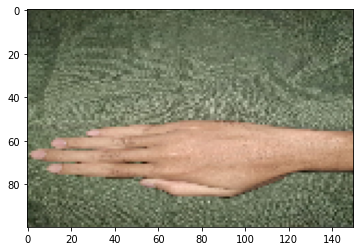

In [69]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper alias kertas')
  elif classes[0][1]==1:
    print('rock alias batu')
  elif classes[0][2]==1:
    print('scissor alias gunting')  
  else:
    print('gambar tidak diketahui')

Hasil diatas, merupakan gambar tangan yang saya ambil sendiri menggunakan kamera gawai pintar, karena kamera saya kurang bagus, hasil gambar menjadi pecah. Saya tidak menguji menggunakan gambar dari dataset karena menurut opini pribadi saya, jika menggunakan gambar dari dataset akan pasti bisa tertebak.